In [88]:
from sklearn import datasets
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [30]:
print('Keys of iris_dataset:\n', iris.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [31]:
print(iris['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [32]:
print('Target names:', iris['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [33]:
print('Feature names:', iris['feature_names'])

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [34]:
print('Type of data:', type(iris['data']))

Type of data: <class 'numpy.ndarray'>


In [37]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [36]:
print('Shape of data:', iris['data'].shape)

Shape of data: (150, 4)


In [38]:
print('Target:\n', iris['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [40]:
print('Type of target: ', type(iris['target']))

Type of target:  <class 'numpy.ndarray'>


In [6]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],random_state=1,stratify=y)

Using stratify=True will give class labels with the same proportion of the raw input dataset.

In [45]:
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y_train: [38 37 37]


In [46]:
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_test: [12 13 13]


In [47]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [48]:
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


## Data exploration

In [51]:
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

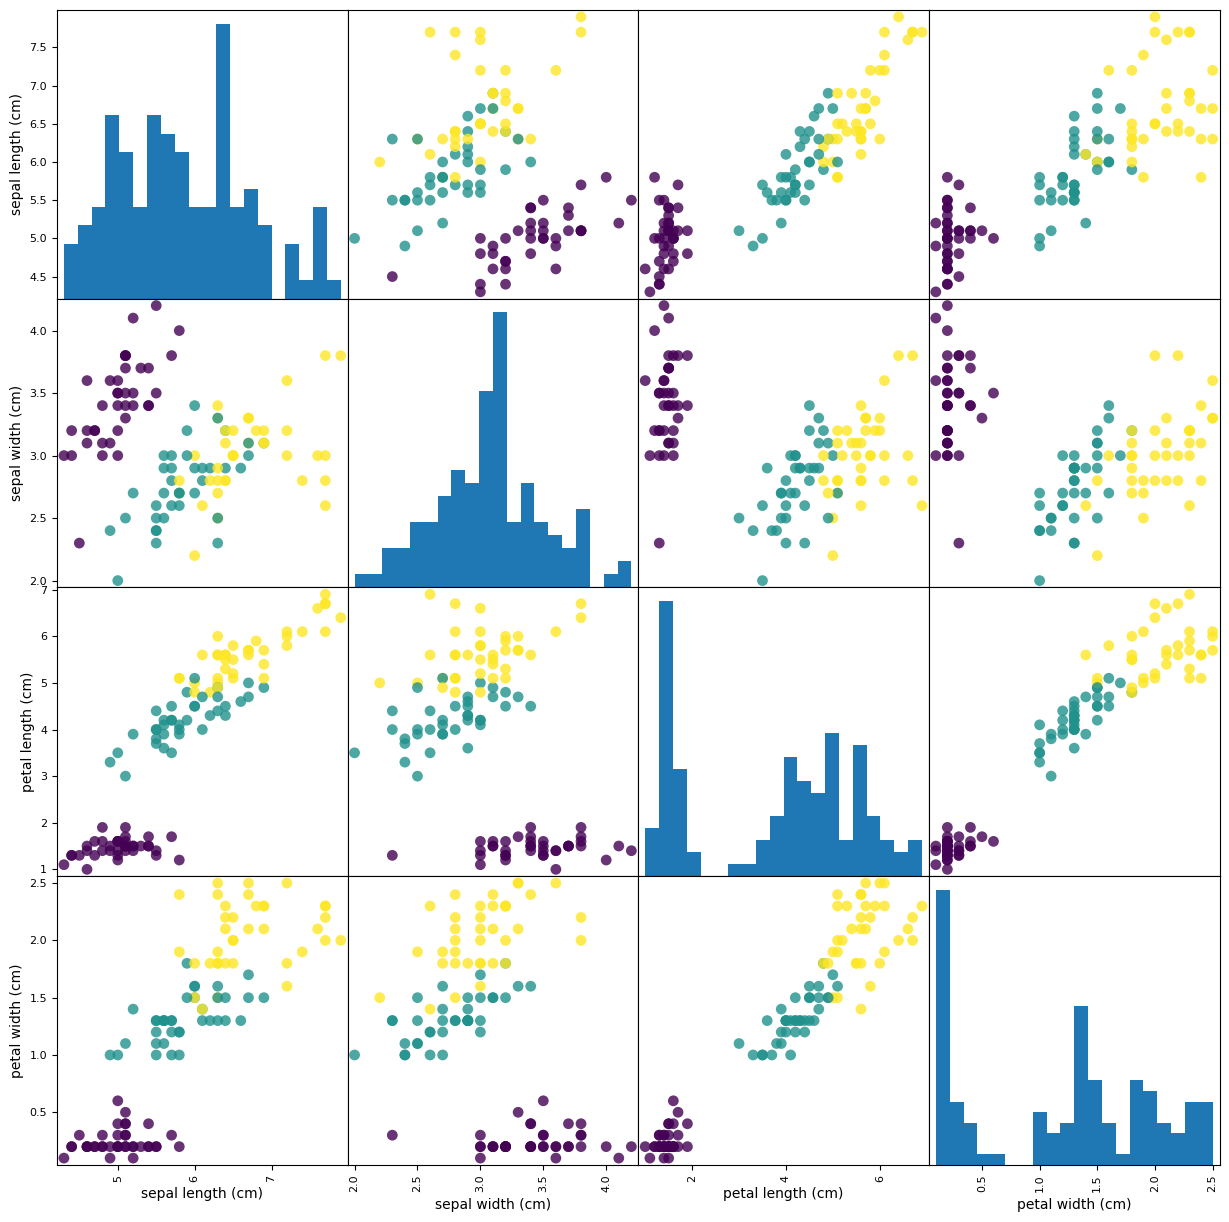

In [52]:
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(15,15),
                           marker='o', hist_kwds={'bins': 20},
                           s=60, alpha=.8)

## K-nearest neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=1)  # initialize the classifier

In [56]:
knn.fit(X_train, y_train)  # train the model

KNeighborsClassifier(n_neighbors=1)

In [57]:
X_new = np.array([[5, 2.9, 1, 0.2]])

In [58]:
X_new.shape

(1, 4)

In [59]:
prediction = knn.predict(X_new)

In [61]:
print('Prediction:', prediction)
print('Predicted target name:',
      iris['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


How do we know that we can trust the model?

## Model evaluation

In [62]:
y_pred = knn.predict(X_test)

In [63]:
print('Test set predictions:\n', y_pred)

Test set predictions:
 [2 0 0 0 1 0 1 1 0 1 2 2 2 1 2 1 2 1 1 1 1 2 2 1 0 0 0 1 2 0 0 2 1 0 0 1 2
 2]


In [64]:
print('Test set score: {:.2f}'.format(np.mean(y_pred==y_test)))

Test set score: 0.97


In [65]:
print('Test set score: {:.2f}'.format(knn.score(X_test, y_test)))

Test set score: 0.97


## Perceptron classifier

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()  # create an instance of standard scaler.

In [14]:
sc.fit(X_train)  # let sc estimated mu and sigma

StandardScaler()

In [16]:
X_train_std = sc.transform(X_train)  # standardize the data
X_test_std = sc.transform(X_test)
# use the same parameters for both test and train datasets

In [17]:
from sklearn.linear_model import Perceptron

In [22]:
ppn = Perceptron(eta0=0.1, random_state=1)  # initialize a new Perceptron instance

In [23]:
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [24]:
y_pred = ppn.predict(X_test_std)

In [27]:
print(f'Misclassified examples: {(y_test != y_pred).sum()}')

Misclassified examples: 1


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')

Accuracy: 0.978


## Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

In [68]:
X, y = mglearn.datasets.load_extended_boston()

In [85]:
X.shape, y.shape

((506, 104), (506,))

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [75]:
lr = LinearRegression().fit(X_train, y_train)

In [76]:
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.90


In [86]:
lr.coef_[:10]

array([-141.09124148,   -4.8998881 ,  -63.00166546,   11.96135018,
         -5.24626962,   99.63971305,   46.76778178,  -39.91337033,
         18.76569692,   34.20787344])

Note that the training set score is higher than the test set score. The model might be overfitted.

## Ridge regression

The coefficients (w) are chosen to fit an additional contraint so that the model generalizes better. Also, the coefficients should be as small as possible so that each feature should have as little effect on the outcome as possible.

In [79]:
from sklearn.linear_model import Ridge

In [80]:
ridge = Ridge().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.84
Test set score: 0.88


Note that the test set score is higher than the training set score. The model might be less overfitted.

### alpha parameter

The greater the alpha, the more generalized it becomes.

In [81]:
for alpha in [0.1, 1.0, 10]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    print('alpha = {}'.format(alpha))
    print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
    print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

alpha = 0.1
Training set score: 0.89
Test set score: 0.92
alpha = 1.0
Training set score: 0.84
Test set score: 0.88
alpha = 10
Training set score: 0.74
Test set score: 0.77


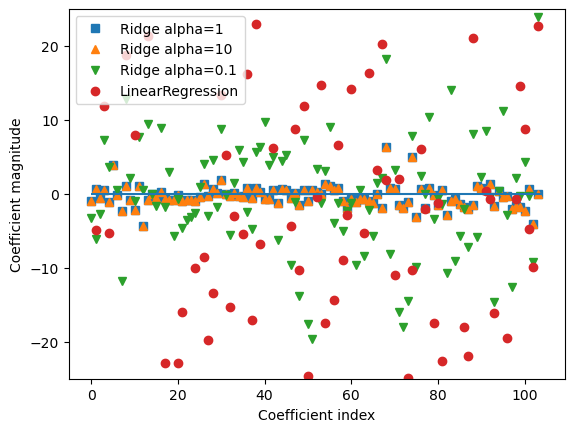

In [90]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=.1).fit(X_train, y_train)
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

## Lasso

L1 regularization renders some coefficients to be zero. This could be thought of automatic feature selection because the features with zero coefficient are ignored.

In [91]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)  # default alpha=1.0
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.24
Test set score: 0.20
Number of features used: 3


In [92]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.86
Test set score: 0.91
Number of features used: 36


# Linear model for classification

## Logistic Regression

/Users/likit/opt/anaconda3/envs/adv-comhealth/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/likit/opt/anaconda3/envs/adv-comhealth/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


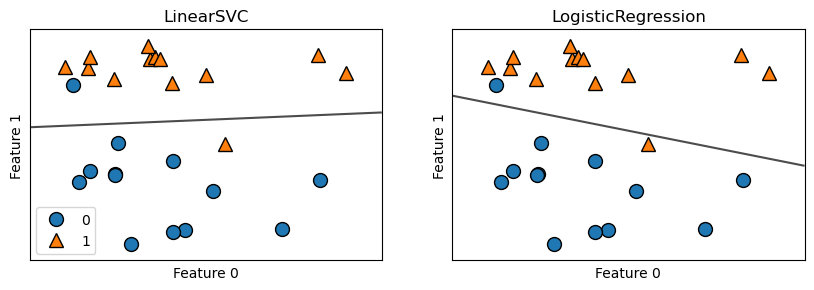

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [95]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [99]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)  # default C=1
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.958


/Users/likit/opt/anaconda3/envs/adv-comhealth/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


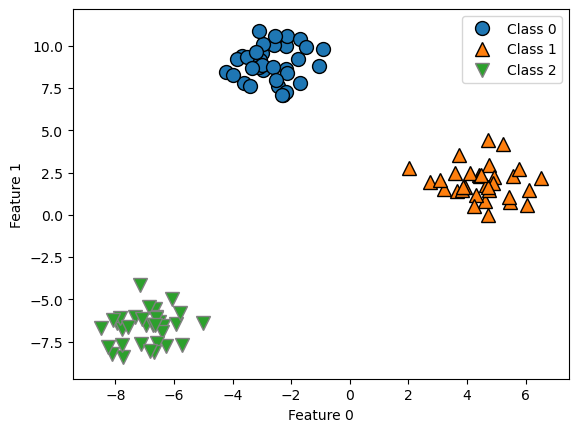

In [102]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [103]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


/Users/likit/opt/anaconda3/envs/adv-comhealth/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


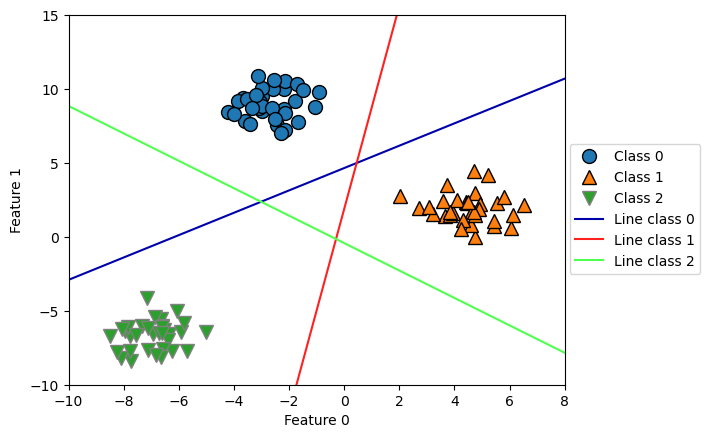

In [104]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))